In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

Min Loss: -0.14710837602615354
Avg Trace/s: 4984.465197030334


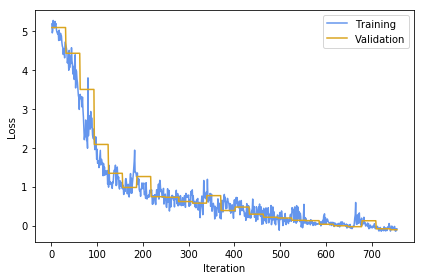

In [2]:
fig, ax = plt.subplots()
#df = df11.append([df9,df10])
df10 = pd.read_csv('/global/project/projectdirs/dasrepo/etalumis/SC19/data/convergence/train_loss_log_15Mdata_BZPT-64-Nodes-1024-LR-12_converge-12799648_larc_poly2')
df10[' valid_loss']=2048*df10[' valid_loss']
df8 = pd.read_csv('/global/project/projectdirs/dasrepo/etalumis/SC19/data/convergence/train_loss_log_15Mdata_BZPT-1024-Nodes-64-LR-50_converge-19948016_128Kglobalbatchsize_larc_poly2_part1')
df9 = pd.read_csv('/global/project/projectdirs/dasrepo/etalumis/SC19/data/convergence/train_loss_log_15Mdata_BZPT-1024-Nodes-64-LR-50_converge-19953666_128kglobalbatchsize_larc_poly2_part2')
df8[' valid_loss'] = df8[' valid_loss']*128
df9[' valid_loss'] = df9[' valid_loss']*128
df_1k = df8.append([df9,df10])
colors = mpl.cm.inferno(np.linspace(0,1,5))[1:-1]
df_1k.plot(' iteration',' loss',ax=ax, label='Training',color='cornflowerblue')
df_1k.plot(' iteration',' valid_loss',ax=ax, label='Validation',color='goldenrod')
#df4[df4[' iteration'] < 198].plot('time',' loss',ax=ax,label='64 nodes')
plt.xlabel('Iteration')
plt.ylabel('Loss')
print("Min Loss:", df_1k[' loss'].min())
print("Avg Trace/s:",df_1k[' traces_per_second'].mean())
plt.tight_layout()
fig.savefig('./edison-1k.pdf')

In [3]:
losslog_list=['rebutrerun_v{run}_cat'.format(run=run) for run in range(1,6)]
#              ,'rebutrerun_v2_cat',
#              'train_loss_log_15Mdata_BZPT-1024-Nodes-64-LR-50_converge-21385483_larc_poly2',
#          'rebutrerun_v3_cat',
#          'train_loss_log_15Mdata_BZPT-1024-Nodes-64-LR-50_converge-21428404_larc_poly2',
#          'train_loss_log_15Mdata_BZPT-1024-Nodes-64-LR-50_converge-21434793_larc_poly2']
#losslog_list=['rebutrerun_v2_cat']

In [4]:
loss_dir='/global/cscratch1/sd/wbhimji/etalumis_networks/logs/'
df_list=[]
for log in losslog_list:
    df_list.append(pd.read_csv(loss_dir+log))

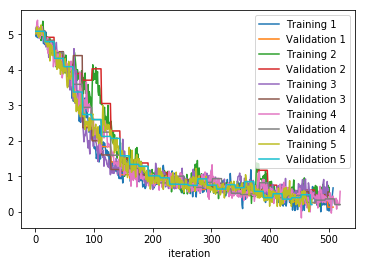

In [5]:
fig, ax = plt.subplots()
for idx,df in enumerate(df_list):
    df.plot(' iteration',' loss',ax=ax, label='Training '+str(idx+1))
    df[' valid_loss']=128*df[' valid_loss']
    df.plot(' iteration',' valid_loss',ax=ax, label='Validation '+str(idx+1))
    if idx==0: 
        dfmean=df/len(df_list)
        df_sq=df*df
    else: 
        dfmean+=df/len(df_list)
        df_sq+=df*df

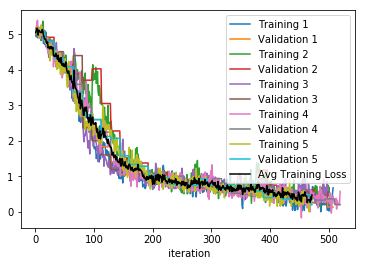

In [6]:
dfmean.plot(' iteration',' loss', label='Avg Training Loss',ax=ax ,color='black')
fig

In [7]:
dfmean['stdev'] = np.sqrt((df_sq[' loss'] / 5) - (dfmean[' loss'] * dfmean[' loss'] )) 
dfmean['valid_stdev'] = np.sqrt((df_sq[' valid_loss'] / 5) - (dfmean[' valid_loss'] * dfmean[' valid_loss'] )) 

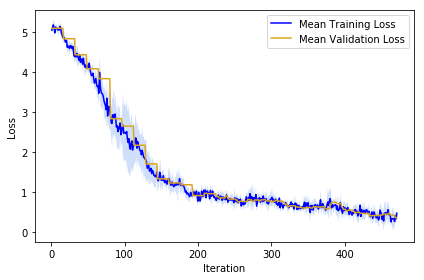

In [8]:
fig,ax=plt.subplots()
#df_1k.plot(' iteration',' loss',ax=ax, label='Training',color='cornflowerblue')
#df_1k.plot(' iteration',' valid_loss',ax=ax, label='Validation',color='goldenrod')
dfmean.plot(' iteration',' loss', label='Mean Training Loss',ax=ax ,color='blue')
plt.fill_between(dfmean[' iteration'], dfmean[' loss']-dfmean['stdev'], dfmean[' loss']+dfmean['stdev'],
                 facecolor='cornflowerblue', alpha=0.3)
dfmean.plot(' iteration',' valid_loss', label='Mean Validation Loss',ax=ax ,color='goldenrod')
#plt.fill_between(dfmean[' iteration'], dfmean[' loss']-dfmean['valid_stdev'], dfmean[' loss']+dfmean['valid_stdev'],
#                facecolor='goldenrod', alpha=0.3)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.tight_layout()
fig.savefig('./loss_mean.pdf')